In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
df=pd.read_csv("covid19.csv",parse_dates=['Date'])
df.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000 2020-01-22        2.0   
1            NaN          Japan  36.0000  138.0000 2020-01-22        2.0   
2            NaN      Singapore   1.2833  103.8333 2020-01-22        0.0   
3            NaN          Nepal  28.1667   84.2500 2020-01-22        0.0   
4            NaN       Malaysia   2.5000  112.5000 2020-01-22        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [3]:
#remaing coloums for easy usage
df.rename(columns={'Date':'date',
                   'province/State':'state',
                  'Country/Region':'country',
                  'Lat':'lat','Long':'long',
                  'Confirmed':'confirmed',
                  'Deaths':'deaths',
                   'Recovered':'recovered'
                  },inplace=True)

In [4]:
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']#if 10 cases are confirmed

In [5]:
top =df[df['date'] == df['date'].max()]#most number of active cases
world = top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world.head()#two coloumns with the same country they groupby,dataframe called world

country  confirmed  active  deaths
0  Afghanistan       40.0    38.0     1.0
1      Albania       89.0    85.0     2.0
2      Algeria      201.0   119.0    17.0
3      Andorra      113.0   111.0     1.0
4       Angola        2.0     2.0     0.0

In [11]:
figure = px.choropleth(world, locations="country",#pltly which is very popular in visualisation
                      locationmode='country names', color='active',
                      hover_name="country",range_color=[1,1000],
                      color_continuous_scale='peach',
                      title='countries with Active Cases')
figure.show()

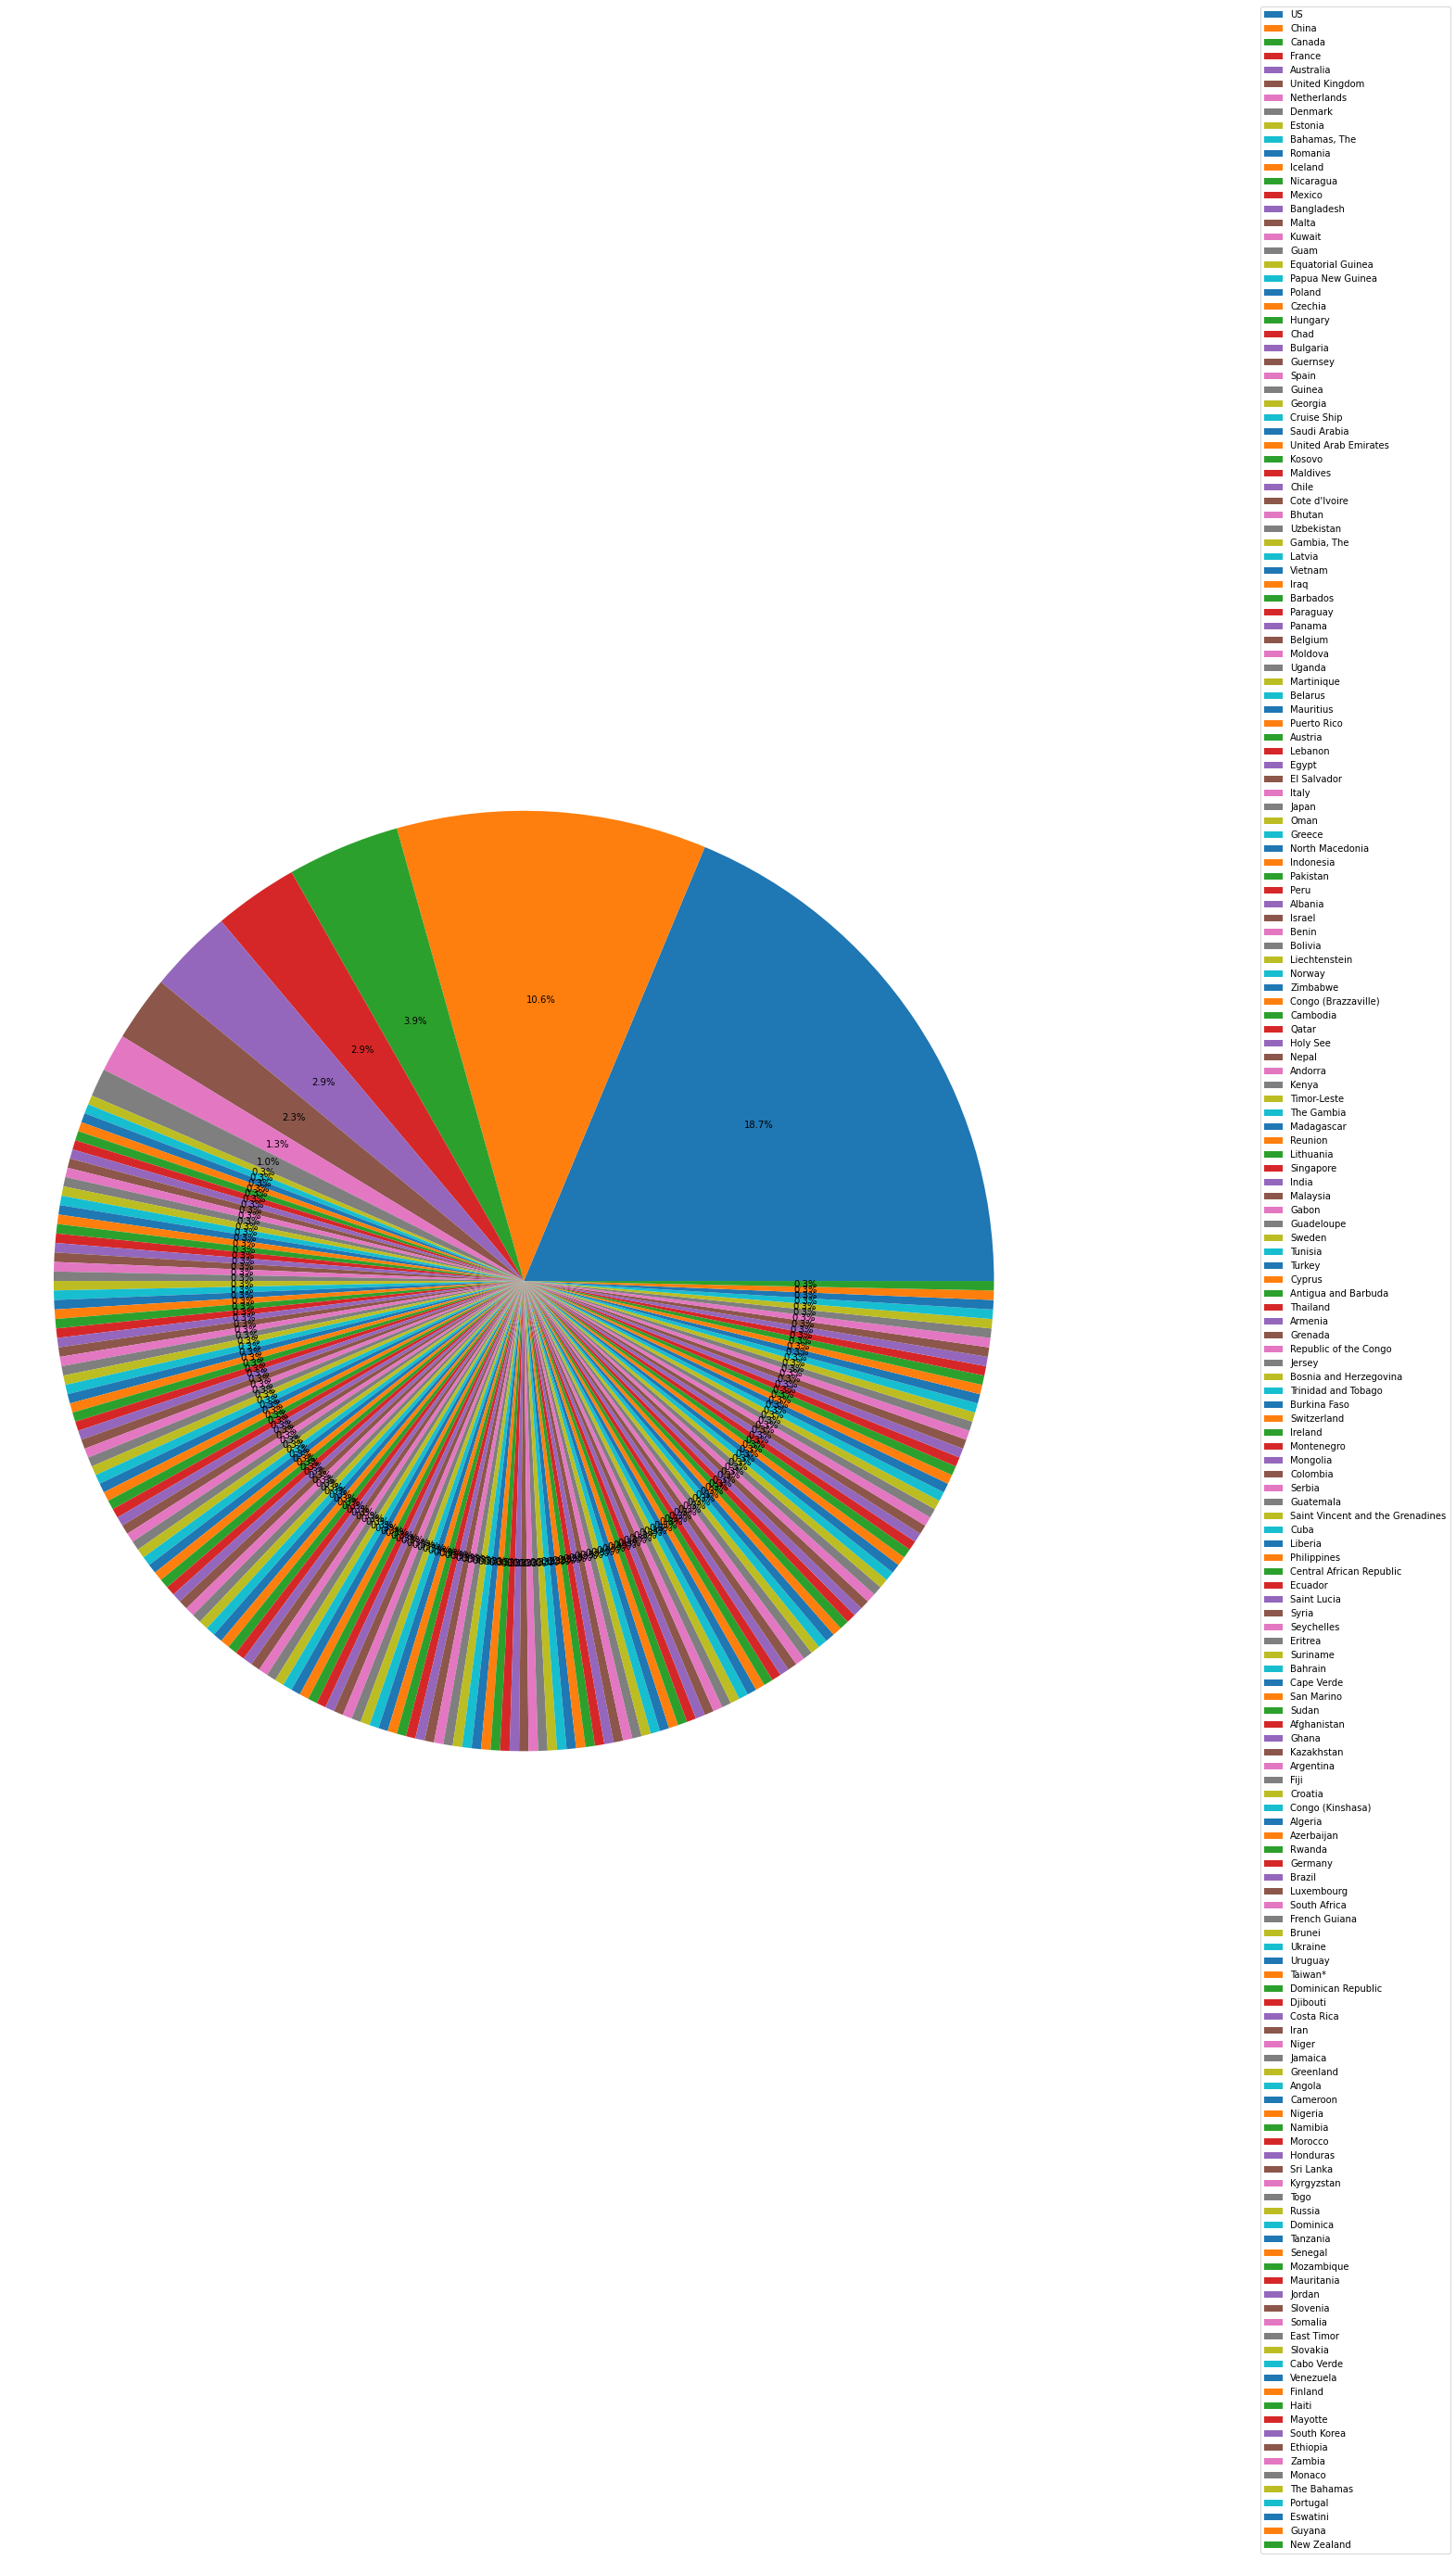

In [6]:
fig,ax=plt.subplots(figsize=(20,20), subplot_kw=dict(aspect="equal"))
number_of_countries = df["country"].value_counts()
labels = number_of_countries.index
sizes=number_of_countries.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9,0,0.5,1))
ax.axis("equal")
plt.show()

[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

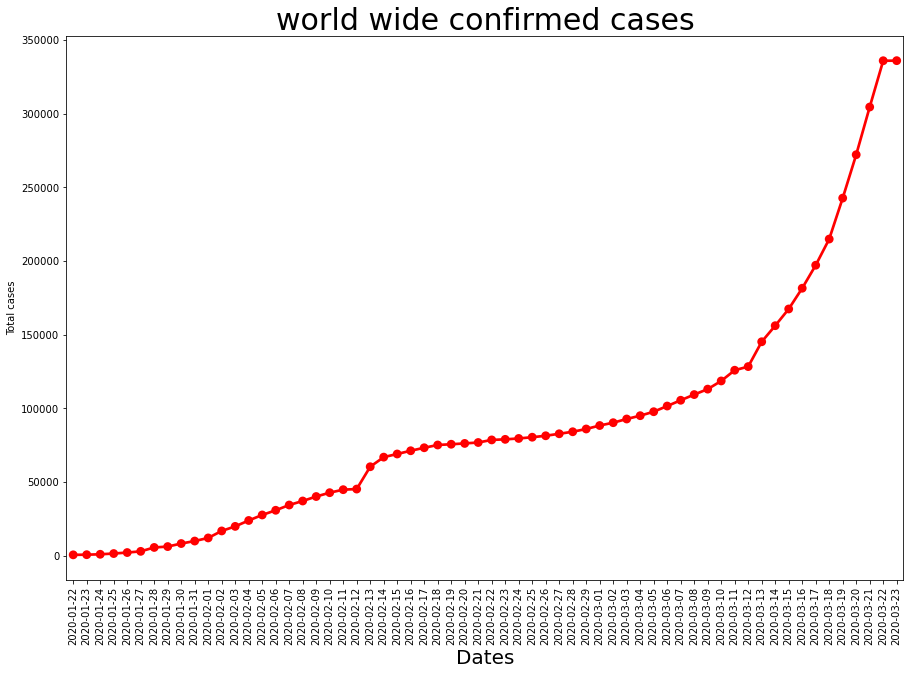

In [7]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Dates",fontsize=20)
plt.xlabel("Total cases",fontsize=20)
plt.title("world wide confirmed cases",fontsize=30)
total_cases=df.groupby('date')['date','confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

px=sns.pointplot(x=total_cases.date.dt.date ,y=total_cases.confirmed , color='r')
px.set(xlabel='Dates',ylabel='Total cases')


In [8]:
top_actives = top.groupby(by= 'country')['active'].sum().sort_values(ascending= False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

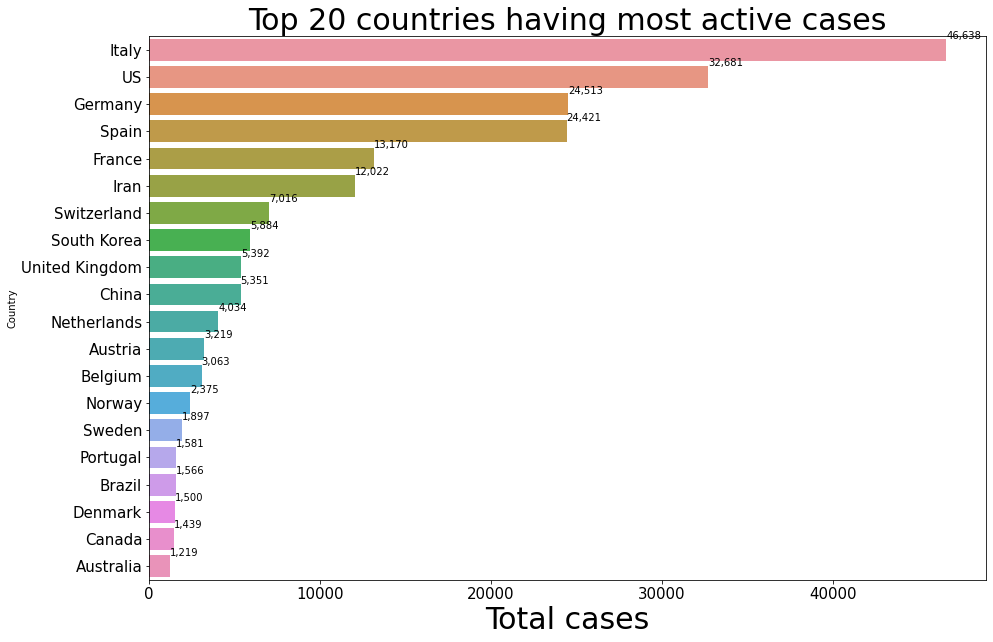

In [10]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.xlabel('Country',fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)
ax=sns.barplot(x=top_actives.active,y=top_actives.country)
for i,(value,name) in enumerate(zip(top_actives.active,top_actives.country)):
    ax.text(value, i-0.5, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases',ylabel='Country')


In [11]:
top_deaths=top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

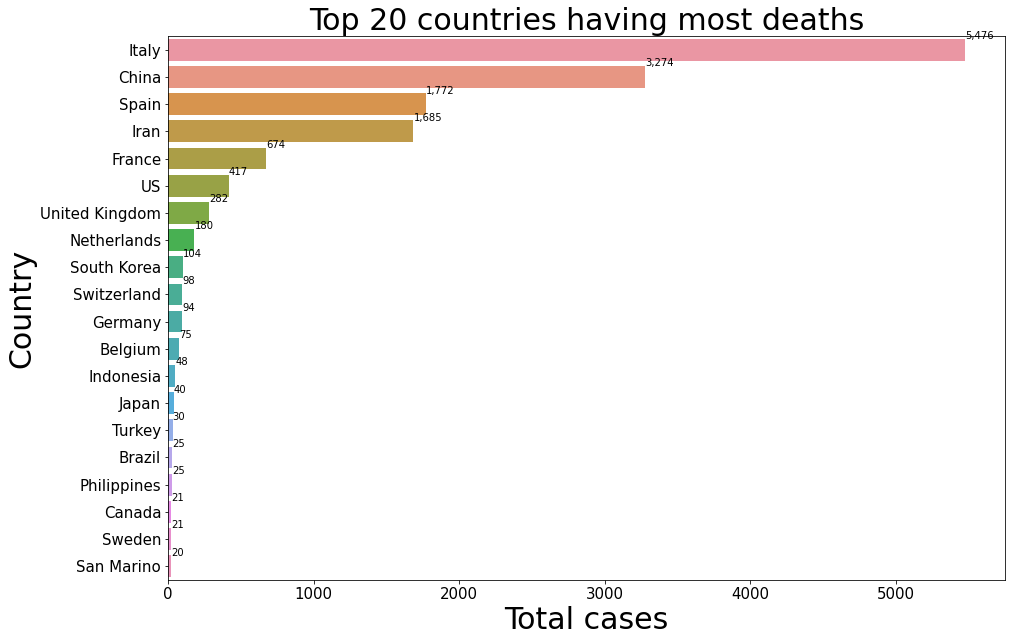

In [12]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title("Top 20 countries having most deaths",fontsize=30)
ax= sns.barplot(x=top_deaths.deaths,y=top_deaths.country)
for i,(value,name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value, i-0.5 , f'{value:,.0f}', size=10,ha='left',va='center')
ax.set(xlabel='Total cases',ylabel='Country')

In [15]:
#recovered cases
top_recovered = top.groupby(by='country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()
top_recovered

country  recovered
0            China    72814.0
1             Iran     7931.0
2            Italy     7024.0
3      South Korea     2909.0
4            Spain     2575.0
5           France     2200.0
6      Cruise Ship      325.0
7          Germany      266.0
8          Belgium      263.0
9            Japan      235.0
10              US      178.0
11         Bahrain      149.0
12       Singapore      144.0
13        Malaysia      139.0
14     Switzerland      131.0
15       Australia       88.0
16  United Kingdom       67.0
17         Algeria       65.0
18         Romania       64.0
19            Iraq       57.0

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

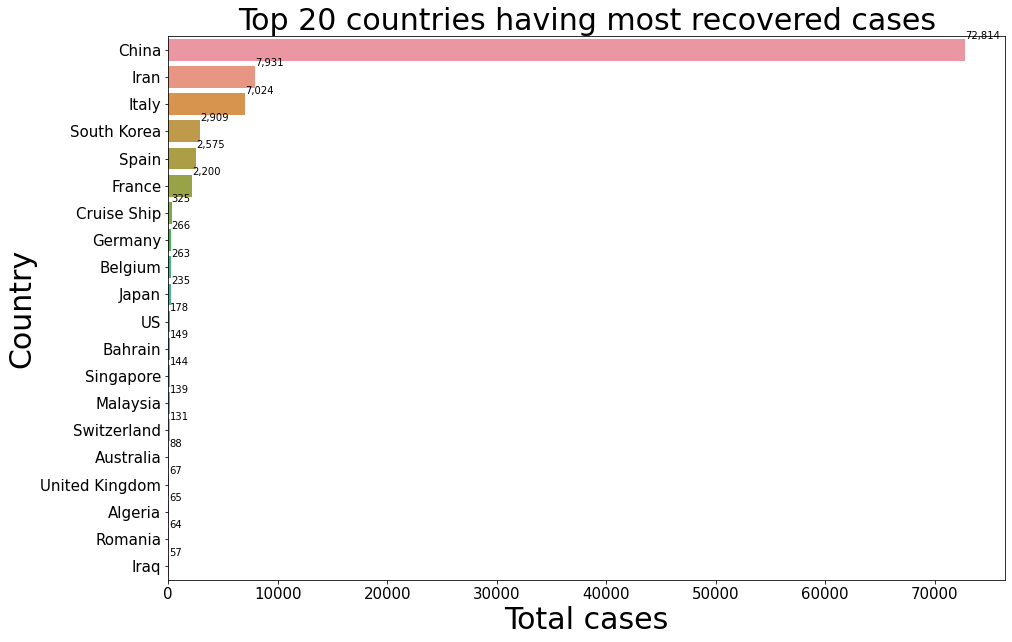

In [16]:
#ploting the recoevred cases in a bar chart
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title("Top 20 countries having most recovered cases" ,fontsize=30)
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
for i, (value, name) in enumerate(zip(top_recovered.recovered,top_recovered.country)):
    ax.text(value,i-0.5,f'{value:,.0f}', size=10,ha='left',va='center')
ax.set(xlabel='Total cases',ylabel='Country')


In [17]:
china = df[df.country == 'China']
china = china.groupby(by = 'date')['recovered','deaths','confirmed','active'].sum().reset_index()


In [18]:
us = df[df.country == 'US']
us = us.groupby(by = 'date')['recovered','deaths','confirmed','active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index',axis=1)

In [19]:
italy = df[df.country == 'Italy']
italy = italy.groupby(by = 'date')['recovered','deaths','confirmed','active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index',axis=1)

In [20]:
india = df[df.country == 'India']
india = india.groupby(by = 'date')['recovered','deaths','confirmed','active'].sum().reset_index()
india = india.iloc[33:].reset_index().drop('index',axis=1)

In [21]:
iran = df[df.country == 'Iran']
iran = iran.groupby(by = 'date')['recovered','deaths','confirmed','active'].sum().reset_index()
iran = iran.iloc[33:].reset_index().drop('index',axis=1)

Text(0.5, 0, 'No. of Days')

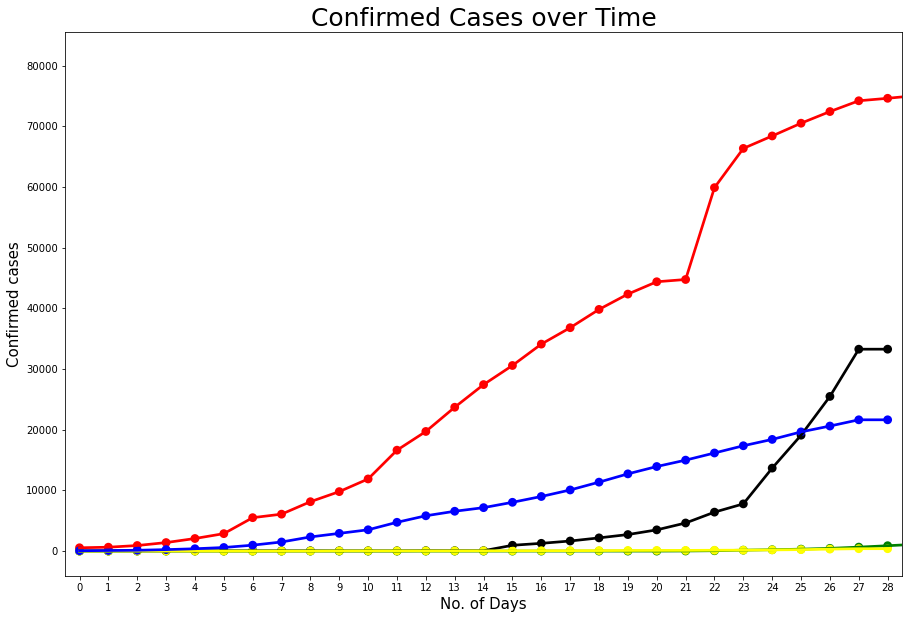

In [22]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.confirmed,color="Red")
sns.pointplot(us.index,us.confirmed,color="Black")
sns.pointplot(italy.index,italy.confirmed,color="Green")
sns.pointplot(india.index,india.confirmed,color="Yellow")
sns.pointplot(iran.index,iran.confirmed,color="Blue")

plt.title("Confirmed Cases over Time",fontsize=25)
plt.ylabel('Confirmed cases',fontsize=15)
plt.xlabel('No. of Days',fontsize=15)

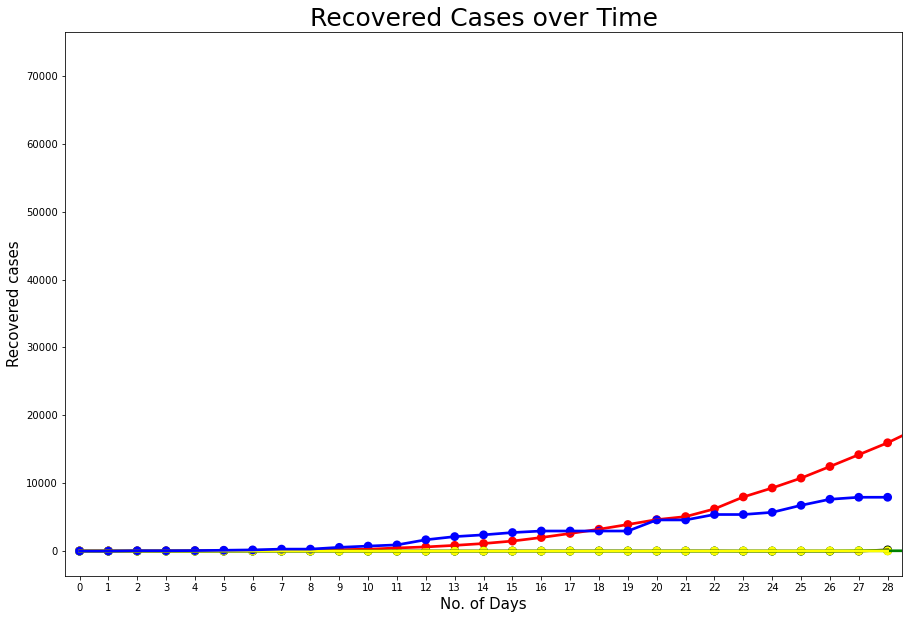

In [23]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.recovered,color="Red")
sns.pointplot(us.index,us.recovered,color="Black")
sns.pointplot(italy.index,italy.recovered,color="Green")
sns.pointplot(india.index,india.recovered,color="Yellow")
sns.pointplot(iran.index,iran.recovered,color="Blue")

plt.title("Recovered Cases over Time",fontsize=25)
plt.ylabel('Recovered cases',fontsize=15)
plt.xlabel('No. of Days',fontsize=15)
plt.show()

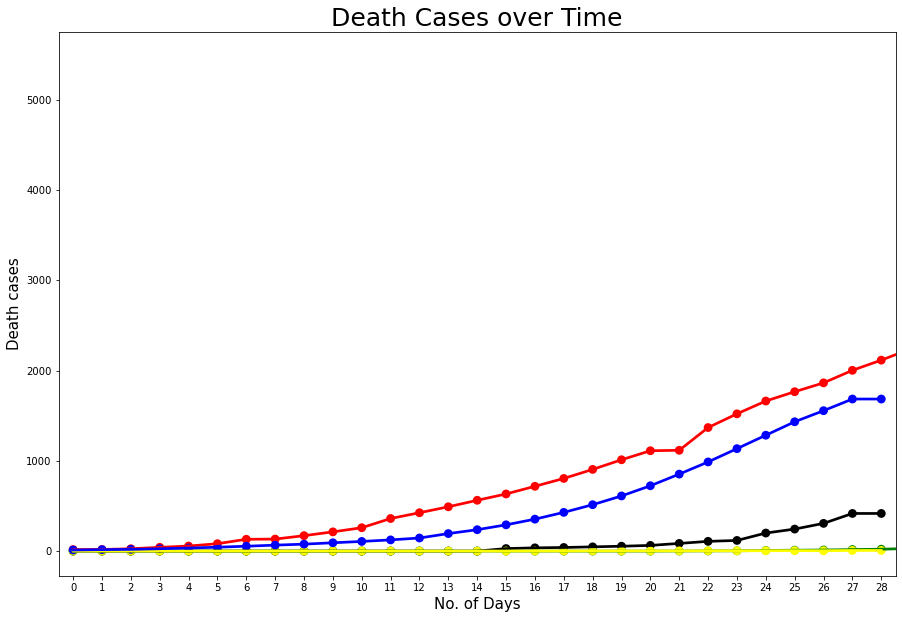

In [24]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index,china.deaths,color="Red")
sns.pointplot(us.index,us.deaths,color="Black")
sns.pointplot(italy.index,italy.deaths,color="Green")
sns.pointplot(india.index,india.deaths,color="Yellow")
sns.pointplot(iran.index,iran.deaths,color="Blue")

plt.title("Death Cases over Time",fontsize=25)
plt.ylabel('Death cases',fontsize=15)
plt.xlabel('No. of Days',fontsize=15)
plt.show()